In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [11]:
def my_svd(A):
    # compute A^T * A
    AtA = np.dot(A.T, A)

    # eigenvalues & eigenvectors of A^T * A
    eigvals, eigvecs = np.linalg.eig(AtA)

    # sort eigenvalues & eigenvectors in decreasing order
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    # singular values
    singular_values = np.sqrt(eigvals)

    # U = A * V * S.T
    U = np.zeros((A.shape[0], A.shape[0]), dtype=float)
    for i in range(len(singular_values)):
        U[:, i] = np.dot(A, eigvecs[:, i]) / singular_values[i]

    # fill singular values diagonally
    S = np.zeros((U.shape[0], eigvecs.shape[1]), dtype=float)
    for i in range(len(singular_values)):
        S[i, i] = singular_values[i]

    return U, S, eigvecs.T

In [12]:
img = cv2.imread('lenna.tiff', cv2.IMREAD_GRAYSCALE).astype(float)
img /= 255.0    # normalize in range [0, 1]
img.shape

(512, 512)

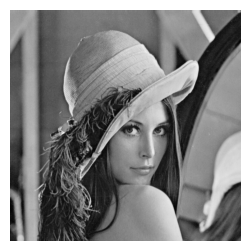

In [13]:
plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

C:\Users\shubh\AppData\Local\Temp\ipykernel_11792\2045123087.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  U[:, i] = np.dot(A, eigvecs[:, i]) / singular_values[i]
C:\Users\shubh\AppData\Local\Temp\ipykernel_11792\2045123087.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  S[i, i] = singular_values[i]
C:\Users\shubh\AppData\Local\Temp\ipykernel_11792\533249128.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  img2 = np.clip(img2, 0, 255).astype(np.uint8)


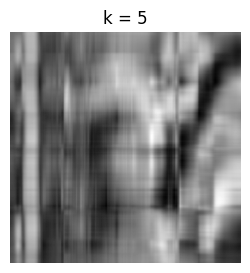

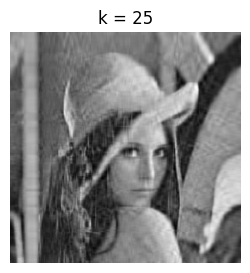

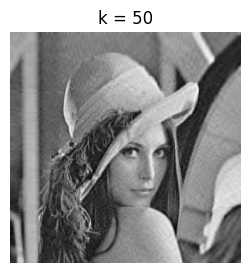

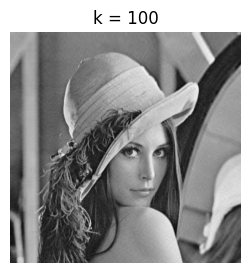

In [14]:
U, S, Vt = my_svd(img)    # decompose using SVD

# re construct image with different level of compression
for k in [5, 25, 50, 100]:
    img2 = np.dot(U[:, :k], np.dot(S[:k, :k], Vt[:k, :]))    # A = U * S * V.T
    # rescale to range [0, 255]
    img2 *= 255.0
    img2 = np.clip(img2, 0, 255).astype(np.uint8)

    plt.figure(figsize=(3,3))
    plt.imshow(img2, cmap='gray')
    plt.title(f'k = {k}')
    plt.axis('off')
    plt.show()

In [15]:
total_variance = np.sum(S**2) #Total sum of squared singular values
variance_ratios = []

for i in range(5, 512, 20):
    # Calculate the variance captured by the first i singular values
    captured_variance = np.sum(S[:i]**2)  # Sum of squared singular values
    variance_ratio = captured_variance / total_variance  # Proportion of total variance
    variance_ratios.append(variance_ratio)

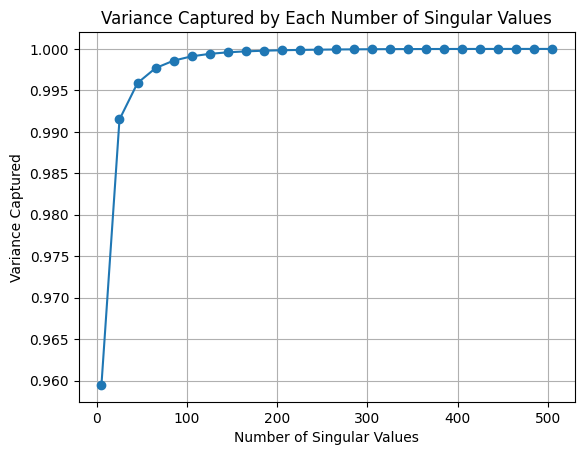

In [16]:
plt.plot(range(5, 512, 20), variance_ratios, marker='o')
plt.xlabel('Number of Singular Values')
plt.ylabel('Variance Captured')
plt.title('Variance Captured by Each Number of Singular Values')
plt.grid(True)
plt.show()
